# Assigment 2 

In this assigment we will work on a regression algorithm for predicting the stock price on a specific date.

# Imports

In [17]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Read from file

In [18]:
df = pd.read_csv("data/TSLA.csv", sep=",")
df.info()  # Check the types for values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2845 non-null   object 
 1   Open       2845 non-null   float64
 2   High       2845 non-null   float64
 3   Low        2845 non-null   float64
 4   Close      2845 non-null   float64
 5   Adj Close  2845 non-null   float64
 6   Volume     2845 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 155.7+ KB


In [19]:
print(f"Any null values? {df.isnull().values.any()}")
df.head()  # Get a overview 

Any null values? False


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


## Clean and convert the data

In [20]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

## See correlations if any

In [21]:
df.corr()
#sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")  #Seaborn plot


,Date,Open,High,Low,Close,Adj Close,Volume
Date,1.000000,0.641076,0.641735,0.640634,0.641184,0.641184,0.466259
Open,0.641076,1.000000,0.999763,0.999691,0.999445,0.999445,0.143866
High,0.641735,0.999763,1.000000,0.999606,0.999771,0.999771,0.149006
Low,0.640634,0.999691,0.999606,1.000000,0.999684,0.999684,0.138580
Close,0.641184,0.999445,0.999771,0.999684,1.000000,1.000000,0.144794
Adj Close,0.641184,0.999445,0.999771,0.999684,1.000000,1.000000,0.144794
Volume,0.466259,0.143866,0.149006,0.138580,0.144794,0.144794,1.000000


### We can see that Close and Adj Close is the same ^

In [22]:
df = df.drop(['Adj Close'], axis='columns')  # Drop the date column

Text(0.5, 1.0, 'TSLA - Closing price')

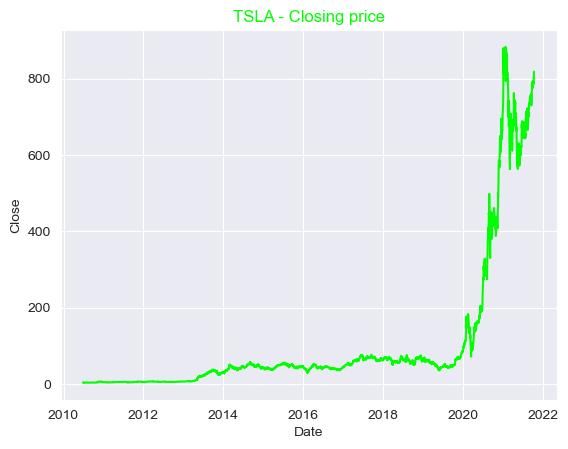

In [23]:
sns.lineplot(df, x='Date', y='Close', color='lime')
plt.title("TSLA - Closing price", color='lime')

### Check for outliers

<Axes: >

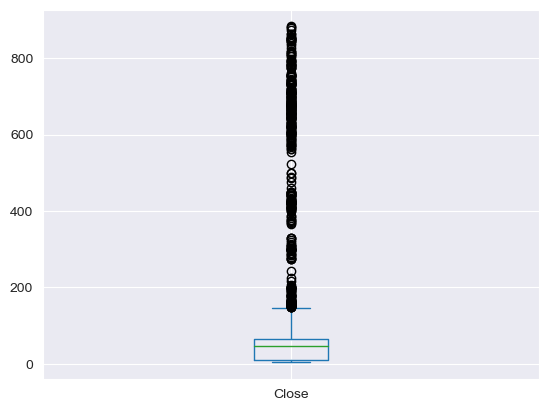

In [24]:
df['Close'].plot.box()


### Remove outliers

In [25]:
# Calculate the IQR for 'percent_delay'
Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows with 'percent_delay' values outside the bounds
df = df[(df['Close'] >= lower_bound) & (df['Close'] <= upper_bound)]

### Check boxplot now

<Axes: >

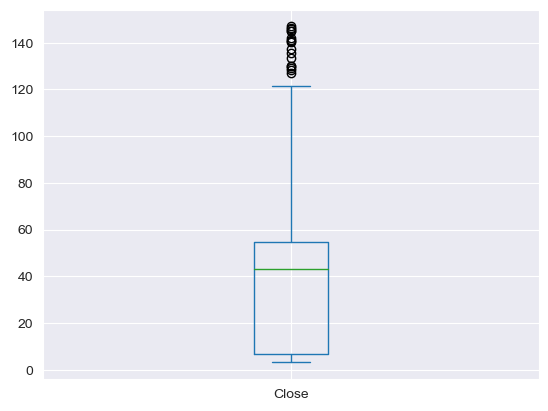

In [26]:
df['Close'].plot.box()

# Show scatterplot

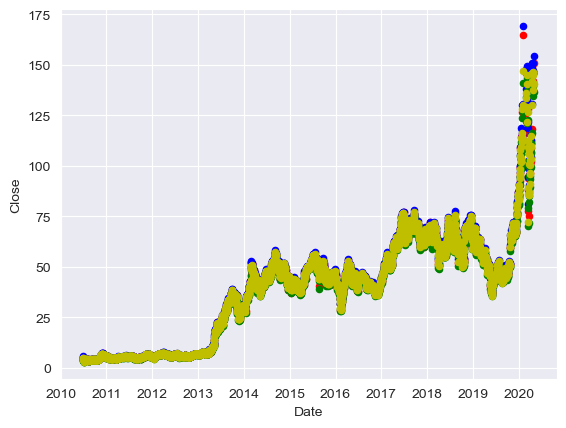

In [27]:
x_axis = 'Date'

ax1 = df.plot(kind='scatter', x=x_axis, y='Open', color='r')
ax2 = df.plot(kind='scatter', x=x_axis, y='High', color='b', ax=ax1)
ax3 = df.plot(kind='scatter', x=x_axis, y='Low', color='g', ax=ax1)
ax4 = df.plot(kind='scatter', x=x_axis, y='Close', color='y', ax=ax1)

# Show lineplot for total volume


Text(0.5, 1.0, 'TSLA - Volume')

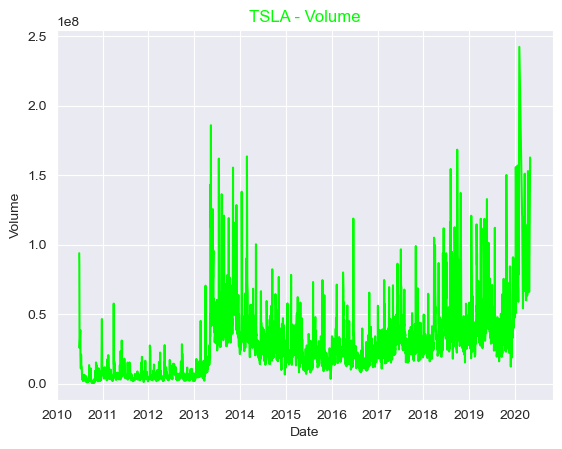

In [28]:
sns.lineplot(df, x='Date', y='Volume', color='lime')
plt.title("TSLA - Volume", color='lime')

In [29]:
# Select only the most interesting parts
#start_date = '2017-01-01'
#end_date = df['Date'].max()  # Latest date

# Use boolean indexing to filter the DataFrame
#df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

### Splitting the training and dataset

In [30]:
df['Timestamp'] = pd.to_datetime(df['Date'])
X = pd.DataFrame(df['Timestamp'])  #Date
y = pd.DataFrame(df['Close'])  #Close

#Now, split the set in training and testing set
#test_size = 0.33 tell the function that 1/3 of values should be put in test array
#Random state is a variable that seeds the random generator. In that way
#you'll get the same training and testing set each run
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

### Perform a regression on the training data


In [31]:
#linear_regressor = LinearRegression()  # create object for the class
#linear_regressor.fit(X_train, y_train)  # perform linear regression
#Y_pred = linear_regressor.predict(X_train)  # make predictions
# Create the polynomial features
polynomial_features = PolynomialFeatures(degree=10)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.fit_transform(X_test)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict using the polynomial regression model
Y_pred = model.predict(X_train_poly)


### Show the results

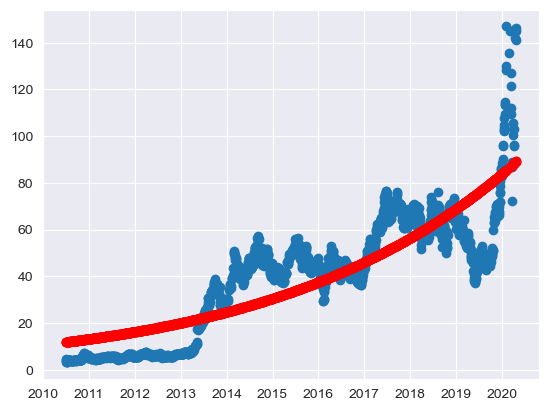

MSE = 193.59576967227548


In [32]:
plt.scatter(X_train, y_train)  #Plot blue dots with real data
#plt.plot(X_train, Y_pred, color='red')  #Plot red line with prediction
plt.scatter(X_train, Y_pred, color='red')  #Plot red line with prediction
plt.show()  #Show the plot
print("MSE = " + str(metrics.mean_squared_error(y_train, Y_pred)))  #Calculate MSE